# Imports

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import seaborn as sns
import numpy as np
%load_ext tensorboard
import datetime, os
import tensorflow as tf

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


2024-04-25 16:01:36.162339: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 16:01:38.924262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Data

In [40]:
validation_data = pd.read_csv("../outputs/checkpoints/validation_perf.txt")
validation_df = pd.DataFrame(validation_data)
print(validation_df)
#--------------------------------------------
training_data = pd.read_csv("../outputs/checkpoints/training_perf.txt")
training_df = pd.DataFrame(training_data)
print(training_df)
#----------------------------------------
config_json_data = pd.read_json("../outputs/checkpoints/model/config.json")
config_json_df = pd.DataFrame(config_json_data)
print(config_json_df)
#----------------------------------------------


   iter  val_ranking_loss  full_rank_MRR@10  full_rank_recall@100  \
0     3        144.957825          0.000000              0.055556   
1     6         64.448247          0.000000              0.055556   
2     9         44.166451          0.012346              0.166667   

   full_rank_recall@200  full_rank_recall@500  
0              0.055556              0.055556  
1              0.055556              0.055556  
2              0.166667              0.166667  
   iter  batch_ranking_loss
0     2            0.528850
1     4          180.483658
2     6          105.833443
3     8            5.406930
4    10           98.163322
             _name_or_path activation          architectures  \
0  distilbert-base-uncased       gelu  DistilBertForMaskedLM   

   attention_dropout  dim  dropout  hidden_dim  initializer_range  \
0                0.1  768      0.1        3072               0.02   

   max_position_embeddings  model_type  n_heads  n_layers  pad_token_id  \
0                   

## yaml

In [31]:
# Function to recursively flatten YAML data
def flatten_yaml(yaml_data, parent_key='', sep='_'):
    items = []
    for k, v in yaml_data.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_yaml(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

with open("../outputs/checkpoints/config.yaml") as file:
    config_yaml_data = yaml.load(file, Loader=yaml.FullLoader)

flat_yaml_data = flatten_yaml(config_yaml_data)

config_yaml_df = pd.DataFrame(list(flat_yaml_data.items()), columns=['Key', 'Value'])
config_yaml_df

,Key,Value
0,config_lr,0.00002
1,config_seed,123
2,config_gradient_accumulation_steps,1
3,config_weight_decay,0.01
4,config_validation_metrics,"[MRR@10, recall@100, recall@200, recall@500]"
5,config_pretrained_no_yamlconfig,False
6,config_nb_iterations,10
7,config_train_batch_size,6
8,config_eval_batch_size,8
9,config_index_retrieve_batch_size,6


# TensorBoard

In [43]:
%tensorboard --logdir=../outputs/checkpoints/tensorboard

# Plotting Learning Curves

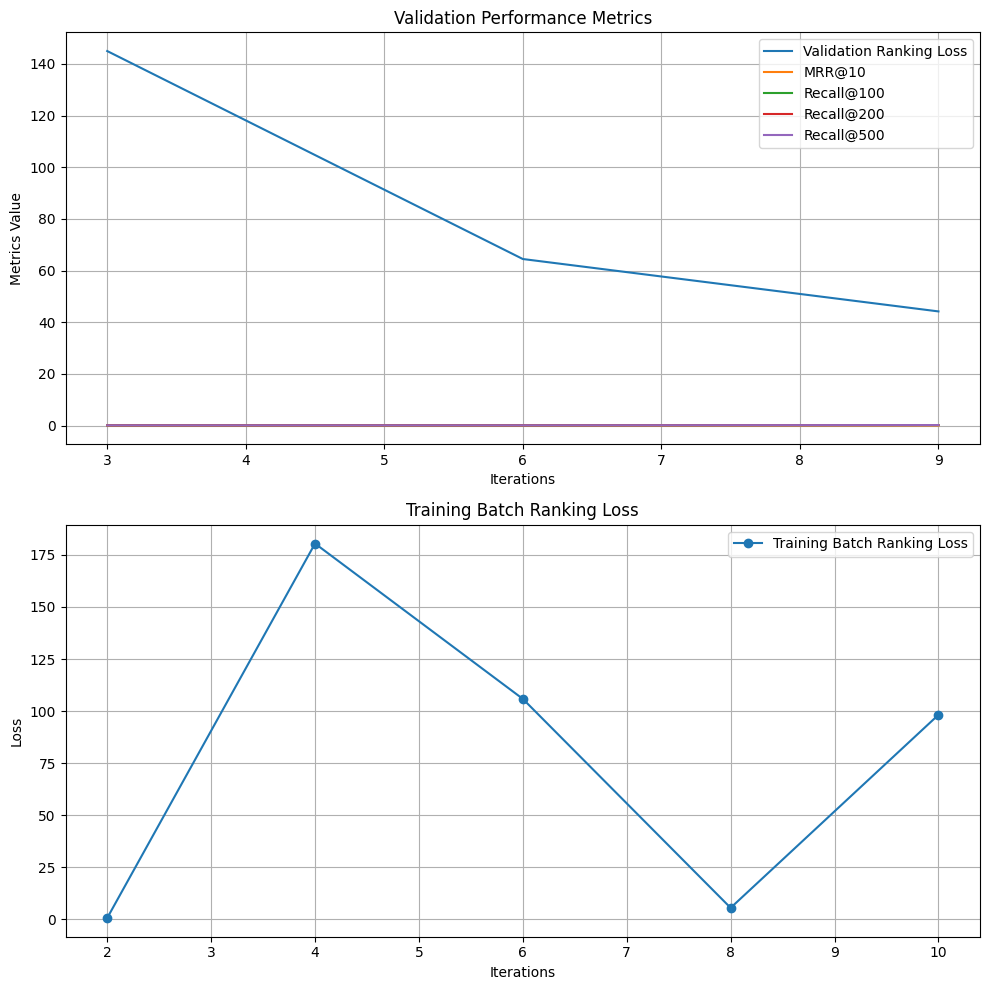

In [12]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Validation Performance
axes[0].plot(validation_df["iter"], validation_df["val_ranking_loss"], label="Validation Ranking Loss")
axes[0].plot(validation_df["iter"], validation_df["full_rank_MRR@10"], label="MRR@10")
axes[0].plot(validation_df["iter"], validation_df["full_rank_recall@100"], label="Recall@100")
axes[0].plot(validation_df["iter"], validation_df["full_rank_recall@200"], label="Recall@200")
axes[0].plot(validation_df["iter"], validation_df["full_rank_recall@500"], label="Recall@500")
axes[0].set_xlabel("Iterations")
axes[0].set_ylabel("Metrics Value")
axes[0].set_title("Validation Performance Metrics")
axes[0].legend()
axes[0].grid(True)

# Training Performance
axes[1].plot(training_df["iter"], training_df["batch_ranking_loss"], label="Training Batch Ranking Loss", marker='o')
axes[1].set_xlabel("Iterations")
axes[1].set_ylabel("Loss")
axes[1].set_title("Training Batch Ranking Loss")
axes[1].legend()
axes[1].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()

# Validation

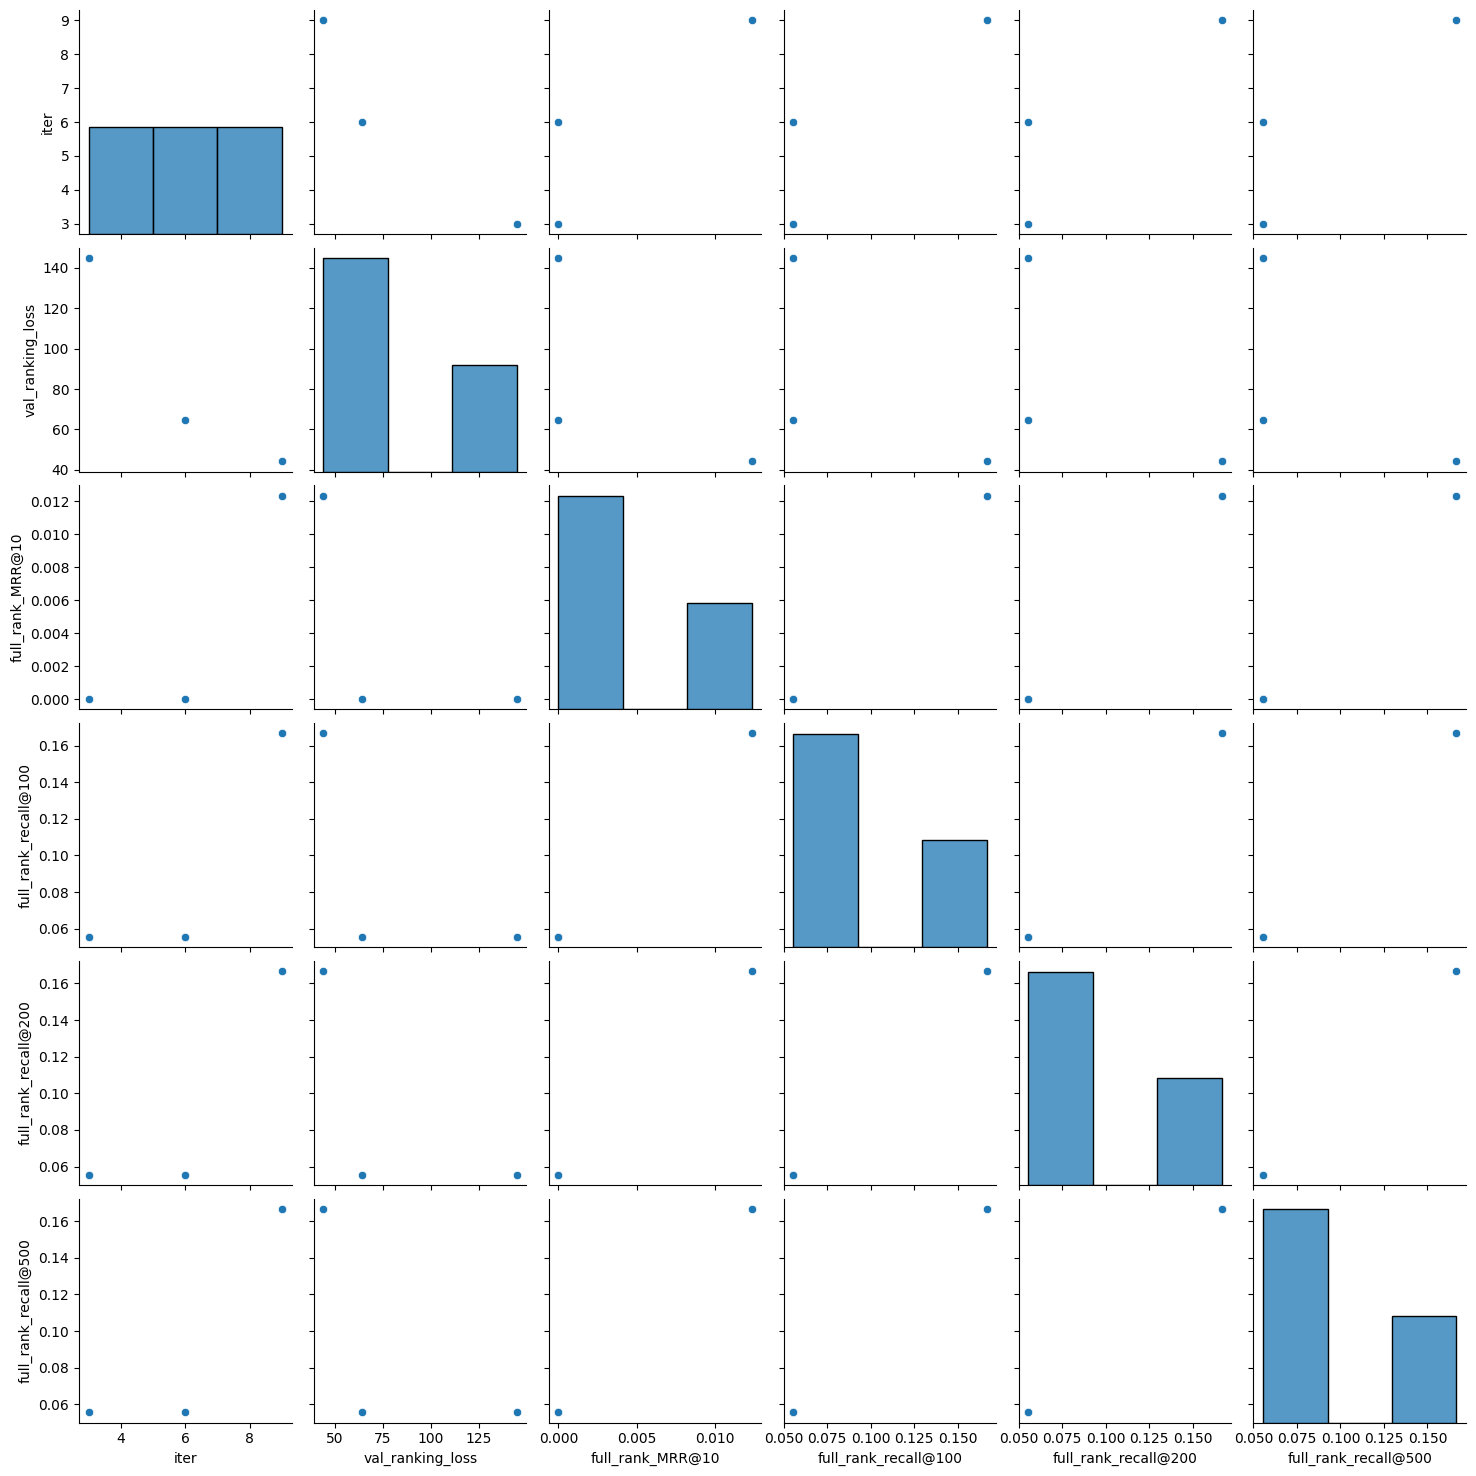

In [34]:
sns.pairplot(validation_df)
plt.show()

# Validation Correlation

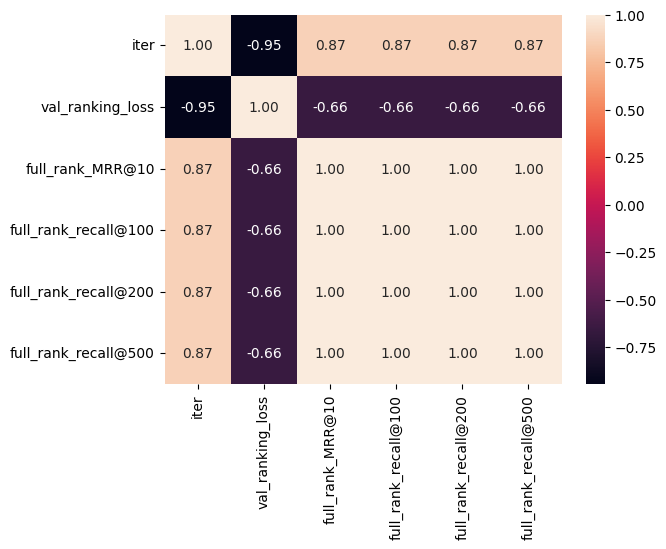

In [35]:
sns.heatmap(validation_df.corr(), annot=True, fmt=".2f")
plt.show()

# box plots

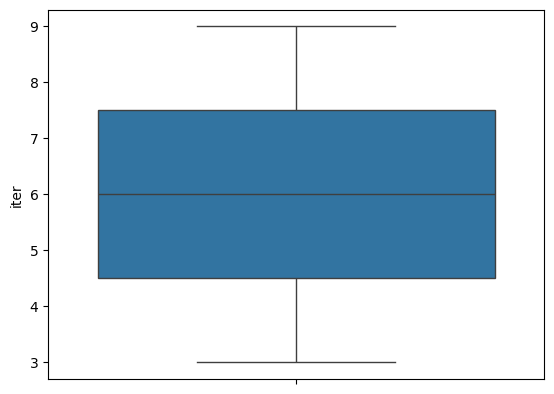

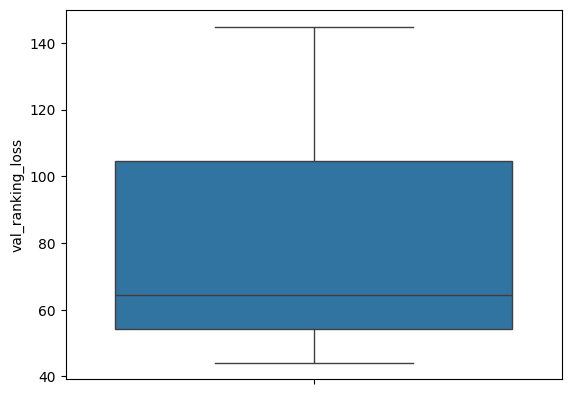

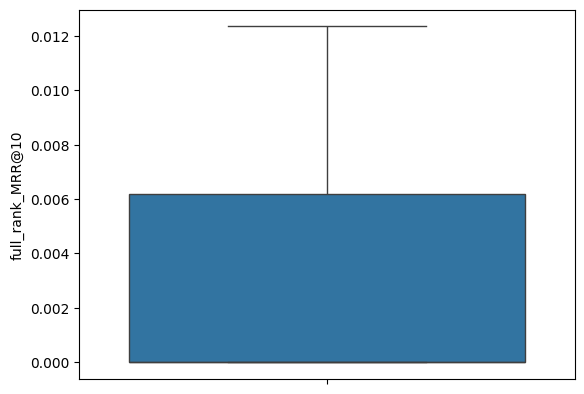

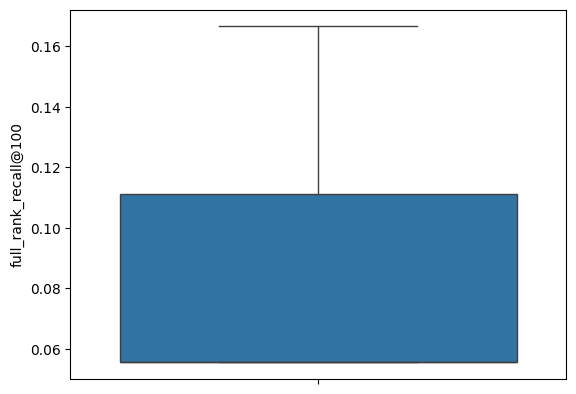

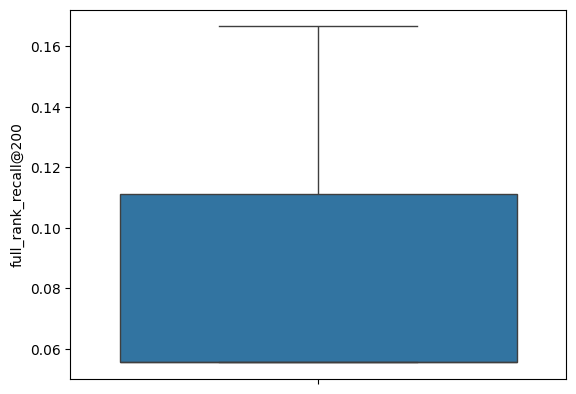

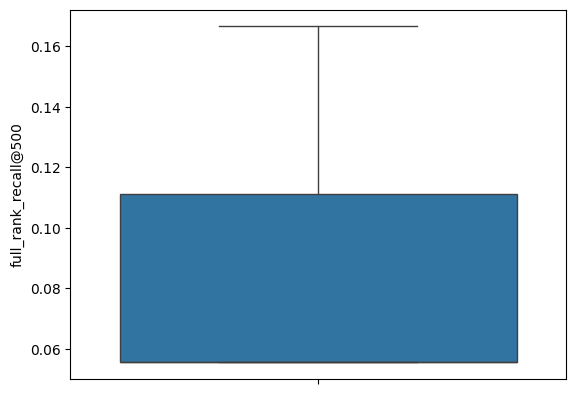

In [38]:
for column in validation_df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(validation_df[column])
    plt.show()